<a href="https://colab.research.google.com/github/jigarcia-2/dm2025a/blob/main/AN%C3%81LISIS_DE_RESULTADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS FINAL DE RESULTADOS

 lenguaje **R**

In [1]:
format(Sys.time(), "%a %b %d %X %Y")

[1] "Sat Aug 16 09:36:16 PM 2025"

In [2]:
require("data.table")
library(data.table)

Loading required package: data.table



In [3]:
# ---------- Analista Jr. (20%) ----------
df_20 <- data.table(
  Conjunto = "Analista Jr. (20%)",
  Tratamiento = rep(c("Ningún tratamiento","Machine Learning","Estadística clásica","Mice"), each = 4),
  Semillas    = rep(c(5,10,20,40), times = 4),
  Ganancia    = c(6215,6295,6765,6795,
                  6935,6465,6755,6515,
                  7025,7326,7205,7055,
                  6575,6735,6365,6685),
  Envios      = c(1900,2000,2400,2400,
                  1900,1800,2400,1800,
                  2300,2200,2400,2300,
                  2200,2400,2400,2000)
)



In [4]:
# ---------- Gerencial (10%) ----------
# Estadística clásica no tenía valores en tu tabla => NA
df_10 <- data.table(
  Conjunto = "Gerencial (10%)",
  Tratamiento = rep(c("Ningún tratamiento","Machine Learning","Estadística clásica","Mice"), each = 4),
  Semillas    = rep(c(5,10,20,40), times = 4),
  Ganancia    = c(4508,4518,4647,4637,
                  4359,4329,4508,4508,
                  4419,   4498,   4498,   4518,
                  4637,4498,4478,4488),
  Envios      = c( 950, 950, 900, 900,
                   1000,1000, 950, 950,
                   1000 ,   950,   950,   950,
                   900, 950, 950, 950)
)

In [5]:
df_all <- rbind(df_20, df_10, fill = TRUE)

nrow(df_all)

[1] 32

Gráficos

In [6]:
library(ggplot2)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


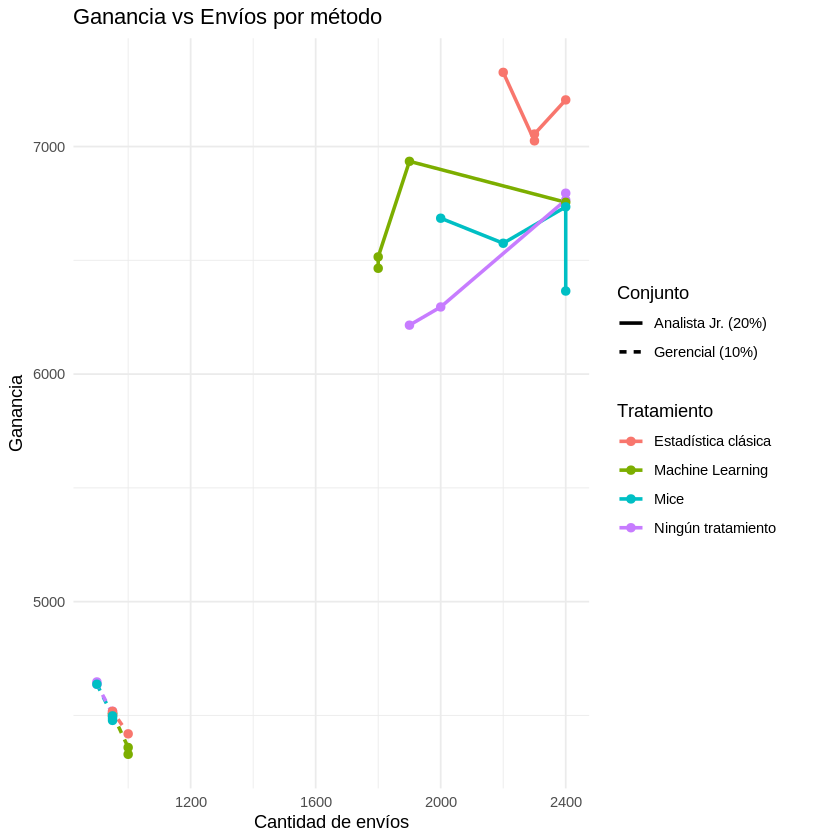

In [7]:
ggplot(df_all[!is.na(Ganancia) & !is.na(Envios)],
       aes(x = Envios, y = Ganancia,
           color = Tratamiento, linetype = Conjunto, group = interaction(Tratamiento, Conjunto))) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "Ganancia vs Envíos por método",
       x = "Cantidad de envíos",
       y = "Ganancia") +
  theme_minimal()

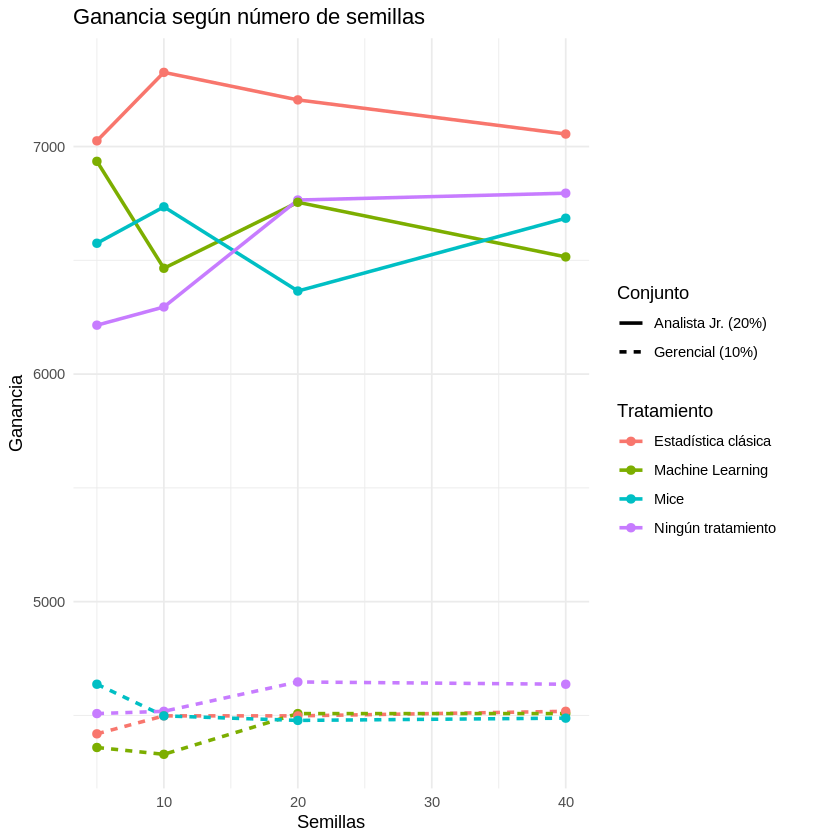

In [8]:
ggplot(df_all[!is.na(Ganancia)],
       aes(x = Semillas, y = Ganancia,
           color = Tratamiento, linetype = Conjunto, group = interaction(Tratamiento, Conjunto))) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "Ganancia según número de semillas",
       x = "Semillas",
       y = "Ganancia") +
  theme_minimal()

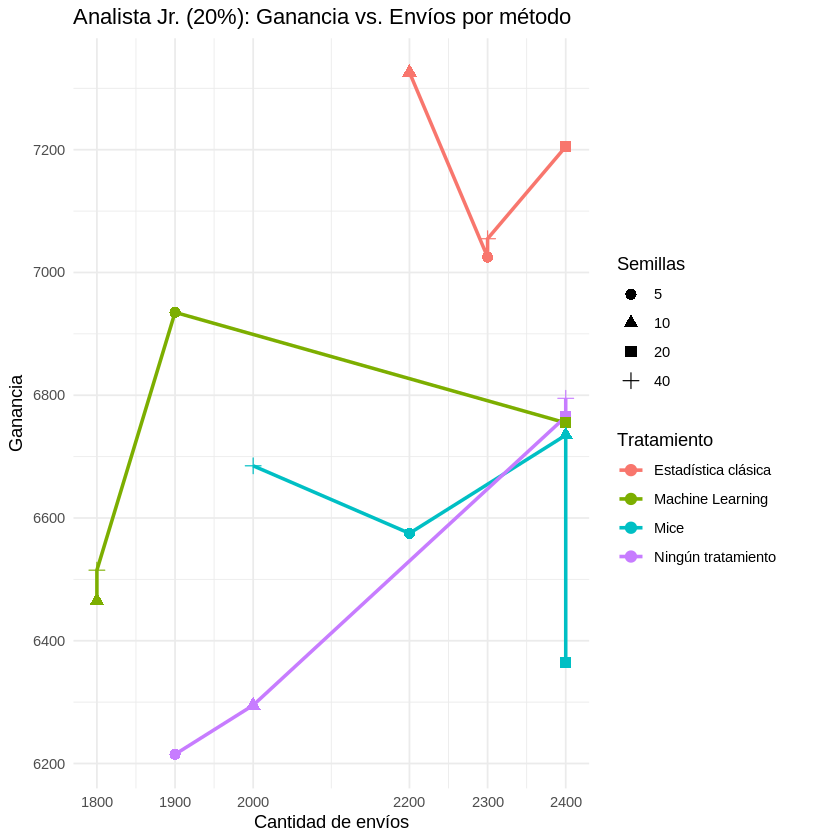

In [9]:
# ---- Gráfico 1: Analista Jr. (20%) ----
p_jr <- ggplot(
  df_20, aes(x = Envios, y = Ganancia, color = Tratamiento)
) +
  geom_line(aes(group = Tratamiento), linewidth = 1) +
  geom_point(aes(shape = factor(Semillas)), size = 2.8) +
  scale_shape_discrete(name = "Semillas", breaks = c("5","10","20","40")) +
  scale_x_continuous(breaks = sort(unique(df_20$Envios))) +
  labs(title = "Analista Jr. (20%): Ganancia vs. Envíos por método",
       x = "Cantidad de envíos", y = "Ganancia") +
  theme_minimal()

print(p_jr)

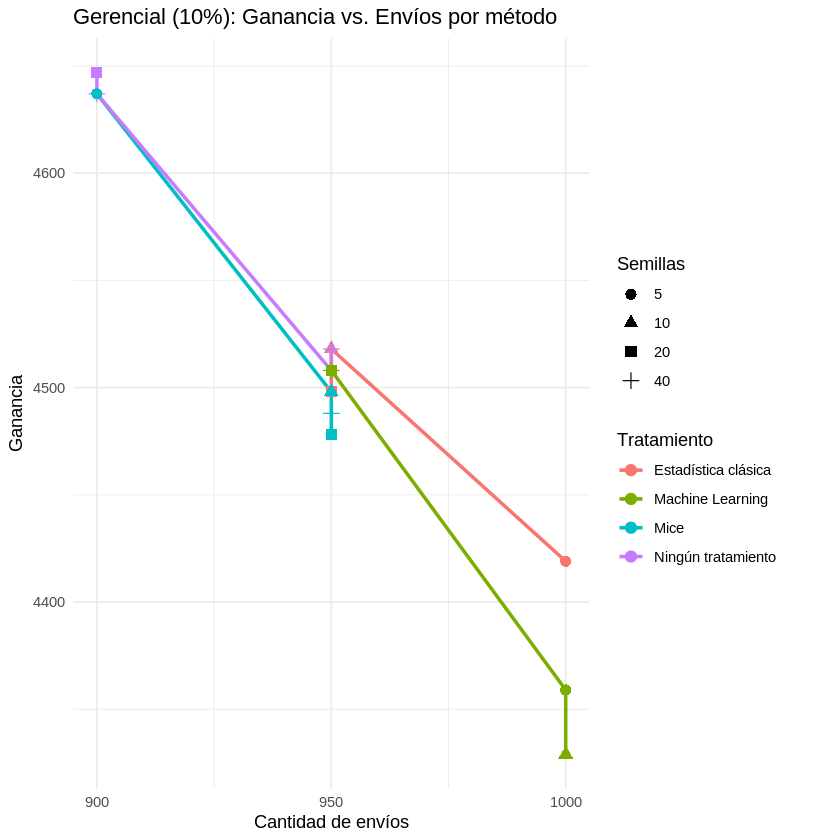

In [10]:
# ---- Gráfico 2: Gerencial (10%) ----
p_ger <- ggplot(
  df_10, aes(x = Envios, y = Ganancia, color = Tratamiento)
) +
  geom_line(aes(group = Tratamiento), linewidth = 1) +
  geom_point(aes(shape = factor(Semillas)), size = 2.8) +
  scale_shape_discrete(name = "Semillas", breaks = c("5","10","20","40")) +
  scale_x_continuous(breaks = sort(unique(df_10$Envios))) +
  labs(title = "Gerencial (10%): Ganancia vs. Envíos por método",
       x = "Cantidad de envíos", y = "Ganancia") +
  theme_minimal()

print(p_ger)

TEST WILCOXON

In [11]:
##TEST WILCOXON
# Jr (20%)
df_jr <- df_20[Tratamiento %in% c("Ningún tratamiento", "Estadística clásica")]

# Gerencial (10%)
df_ge <- df_10[Tratamiento %in% c("Ningún tratamiento", "Estadística clásica")]

# --- Jr ---
gan_jr_none <- df_jr[Tratamiento=="Ningún tratamiento", Ganancia]
gan_jr_est  <- df_jr[Tratamiento=="Estadística clásica", Ganancia]

# --- Gerencial ---
gan_ge_none <- df_ge[Tratamiento=="Ningún tratamiento", Ganancia]
gan_ge_est  <- df_ge[Tratamiento=="Estadística clásica", Ganancia]

# Jr (20%)
wilcox.test(gan_jr_est, gan_jr_none,
            paired = TRUE, alternative = "two.sided")

# Gerencial (10%)
wilcox.test(gan_ge_est, gan_ge_none,
            paired = TRUE, alternative = "two.sided")



# Filtrar solo los métodos de interés en Jr (20%)
df_jr_sub <- df_20[Tratamiento %in% c("Estadística clásica", "Machine Learning")]

# Armar vectores pareados por semilla
gan_jr_est <- df_jr_sub[Tratamiento=="Estadística clásica", Ganancia]
gan_jr_ml  <- df_jr_sub[Tratamiento=="Machine Learning", Ganancia]

# Test de Wilcoxon pareado (dos colas)
wilcox.test(gan_jr_est, gan_jr_ml,
            paired = TRUE, alternative = "two.sided")


	Wilcoxon signed rank exact test

data:  gan_jr_est and gan_jr_none
V = 10, p-value = 0.125
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank exact test

data:  gan_ge_est and gan_ge_none
V = 0, p-value = 0.125
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank exact test

data:  gan_jr_est and gan_jr_ml
V = 10, p-value = 0.125
alternative hypothesis: true location shift is not equal to 0
